# to-do
1. Check behaviour of phi_nl and sph_harm_lm
2. Check scale of sph_harm at higher terms.
3. Is the potential affected by this high order terms?
4. Check that the derivation of A_nl is correct.

In [230]:
%pylab inline
from scipy import special
plt.style.use('dark_background')
import biff
import pygadgetreader

Populating the interactive namespace from numpy and matplotlib


In [40]:
font = {'size':18, 'family':'serif'}
matplotlib.rc('font', **font)

In [2]:
def xi_transformation(r):
    return (r-1)/(r+1)

def Anl(n, l):
    knl = 0.5*n*(n+4*l+3) + (l+1)*(2*l+1)
    A_nl = - 2**(8*l+6)/(4*np.pi*knl) * (special.factorial(n)*(n+2*l+3/2.)*(special.gamma(2*l+3/2.))**2)/(special.gamma(n+4*l+3))
    return A_nl

def phi_nl(n, l, r):
    xi = xi_transformation(r)
    return - special.eval_gegenbauer(n, 2*l + 3/2., xi)* (4*np.pi)**(0.5)*r**l / ((1+r)**(2*l+1))  

In [3]:
def snl(n, l, m, m_p, r_p, theta_p, phi_p):
    A_nl = Anl(n,l)
    if m==0:
        S_nl = A_nl * np.sum(m_p*phi_nl(n, l, r_p)*special.sph_harm(m, l, 0, theta_p)*np.cos(m*phi_p))
        print(np.sum(phi_nl(n, l, r_p)), np.sum(special.sph_harm(m, l, 0, theta_p)), A_nl)
    if m!=0:
        S_nl = 2*A_nl * np.sum(m_p*phi_nl(n, l, r_p)*special.sph_harm(m, l, 0, theta_p)*np.cos(m*phi_p))
    return S_nl.real, np.sum(phi_nl(n, l, r_p)), np.sum(special.sph_harm(m, l, 0, theta_p))

In [28]:
theta_t = np.linspace(0, np.pi, 100)
sph_harm_matrix = np.zeros((20, 100))
for l in range(0, 20):
    sph_harm_matrix[l] = special.sph_harm(0, l, 0, theta_t)

/home/xzk/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  after removing the cwd from sys.path.


Text(0,0.5,'$l$')

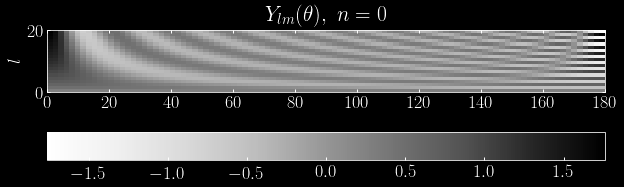

In [116]:
figure(figsize=(10, 5))
title(r'$Y_{lm}(\theta),\ n=0$')
imshow(sph_harm_matrix, origin='lower', extent=[0, 180, 0, 20], cmap='Greys')
colorbar(orientation='horizontal')
ylabel('$l$')

In [95]:
r_t = np.logspace(0, 2, 100)
phi_nl_matrix = np.zeros((20, 100))
for l in range(0, 20):
    phi_nl_matrix[l] = phi_nl(0, l, r_t)

Text(0.5,0,'$\\theta$')

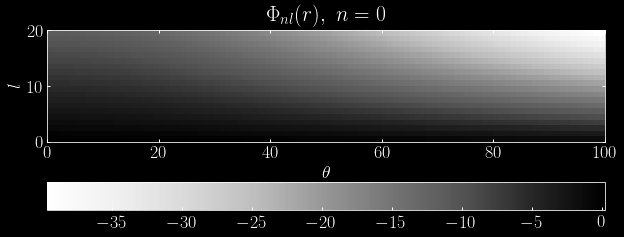

In [112]:
figure(figsize=(10, 5))
title(r'$\Phi_{nl}(r),\ n=0$')
imshow(np.log10(np.abs(phi_nl_matrix)), origin='lower', extent=[0, 100, 0, 20], cmap='Greys')
colorbar(orientation='horizontal')
ylabel('$l$')
xlabel(r'$\theta$')

In [97]:
# Que pasa con esta linea? 
phi_nl_matrix[:,0]

array([ -1.77245385e+00,  -4.43113463e-01,  -1.10778366e-01,
        -2.76945914e-02,  -6.92364786e-03,  -1.73091196e-03,
        -4.32727991e-04,  -1.08181998e-04,  -2.70454994e-05,
        -6.76137486e-06,  -1.69034371e-06,  -4.22585929e-07,
        -1.05646482e-07,  -2.64116205e-08,  -6.60290514e-09,
        -1.65072628e-09,  -4.12681571e-10,  -1.03170393e-10,
        -2.57925982e-11,  -6.44814955e-12])

In [98]:
product_matrix = np.zeros((20, 100))
for l in range(0, 20):
    product_matrix[l] = phi_nl(0, l, r_t) * special.sph_harm(0, l, 0, theta_t).real

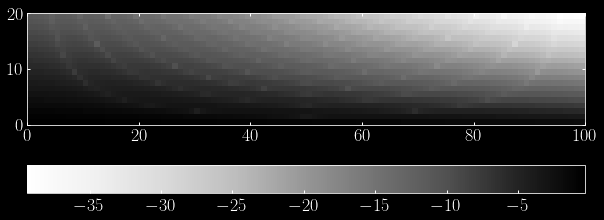

In [113]:
figure(figsize=(10, 5))
imshow(np.log10(np.abs(product_matrix)), origin='lower', extent=[0, 100, 0, 20], cmap='Greys')
colorbar(orientation='horizontal')


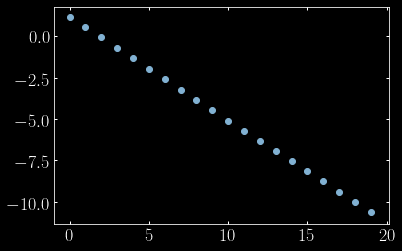

In [100]:
for i in range(20):
    scatter(i, np.log10(np.abs(np.sum(product_matrix[i]))), c='C4')

In [259]:
# data:
spherical_halo = pygadgetreader.readsnap('../data/LMC3_2M_vir_009', 'pos', 'dm')
m = pygadgetreader.readsnap('../data/LMC3_2M_vir_009', 'mass', 'dm')

Returning DM    Positions
Returning DM    Mass


3.999497e-06

In [166]:
x = spherical_halo[:,0]
y = spherical_halo[:,1]
z = spherical_halo[:,2]
m = spherical_halo[:,0]

In [167]:
r = (x**2 + y**2 + z**2)**0.5
theta = np.arccos(z/r)
phi = np.arctan2(y, x)


In [168]:
snl(15, 10, 0, m, r, theta, phi)

-5619.81878154 (-65.833182059+0j) -0.00133734438908


-0.01140499693595449

In [139]:
snl(0, 0, 0, m, r, theta, phi)

-840.817481005 (2820.94791774+0j) -3.0


131.26499819439363

In [140]:
snl(0, 20, 0, m, r, theta, phi)

-1.02490088656e-11 (-0.451501633598+0j) -2.04745181245e+22


-13478706063.713869

In [265]:
S_biff, T_biff = biff.compute_coeffs_discrete(np.double(spherical_halo), np.double(m), 10, 3, skip_m=False, r_s=10.4)

In [266]:
shape(S_biff)

(11, 4, 4)

Text(0,0.5,'$l$')

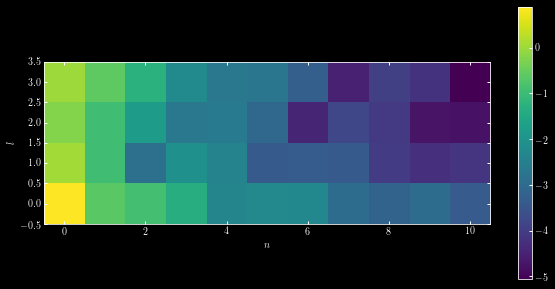

In [267]:
imshow(np.log10(np.abs(S_biff[:,:,0])).T, origin='lower')
colorbar()
xlabel('$n$')
ylabel('$l$')

In [14]:
snl(0, 20, 0, m, r, theta, phi)

-6.79214484952e-10 (231.601515197+0j) -2.04745181245e+22


-27621229138.56369

In [15]:
S_biff[0, 20, 0]

-27621229138.563644

In [16]:
S_biff[:,0,0]

array([ 1454.30005687,   637.29460382,   319.70192035,   159.56661384,
          69.75398434,    16.44550399,   -14.67859021,   -31.00075525,
         -37.84310433,   -39.34739363,   -38.02611498,   -35.03273456,
         -31.24275278,   -27.62161573,   -24.76135415,   -22.69757351])

Text(0.5,0,'$n$')

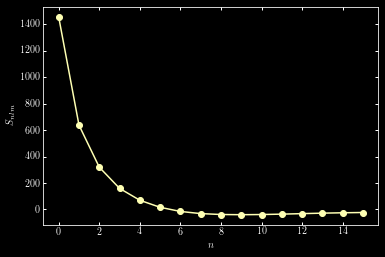

In [23]:
plot(np.arange(0, 16, 1), (S_biff[:,0,0]), '-o', c='C1' )
ylabel('$S_{nlm}$')
xlabel('$n$')

Text(0.5,0,'$l$')

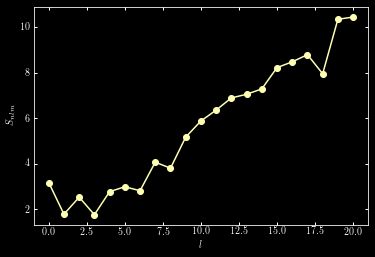

In [24]:
plot(np.arange(0, 21, 1), np.log10(np.abs(S_biff[0,:,0])), '-o', c='C1' )
ylabel('$S_{nlm}$')
xlabel('$l$')

In [19]:
A_nl_t = np.zeros(20)
for i in range(0, 20):
    A_nl_t[i] = Anl(0, i)

Text(0.5,0,'$l$')

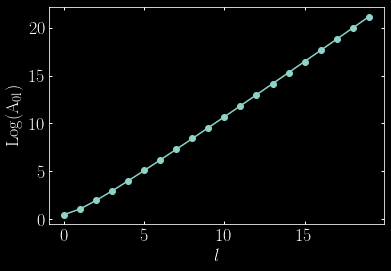

In [74]:
plot(np.arange(0, 20, 1), np.log10(np.abs(A_nl_t)), '-o')
ylabel(r'$\rm{Log}(A_{0l})$')
xlabel('$l$')

In [272]:
pot = biff.potential(np.ascontiguousarray(np.array([np.arange(0, 100, 1), np.zeros(100), np.zeros(100)]).T), S_biff, T_biff, G=1, M=1, r_s=10.4)

In [273]:
dens = biff.density(np.ascontiguousarray(np.array([np.arange(0, 100, 1), np.zeros(100), np.zeros(100)]).T), S_biff, T_biff, M=1, r_s=10.4)

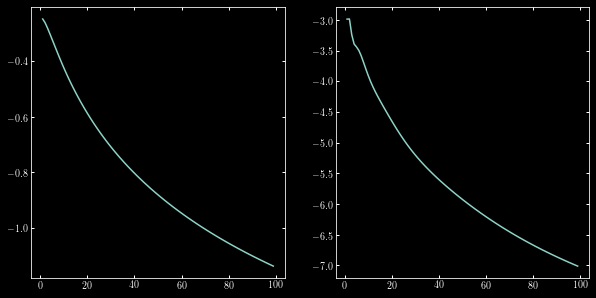

In [274]:
figure(figsize(10, 5))
subplot(1, 2, 1)
plot(np.arange(0, 100, 1), np.log10(np.abs(pot)))

subplot(1, 2, 2)
plot(np.arange(0, 100, 1), np.log10(np.abs(dens)))

## The contribution of the coefficients to the density and potential.

- What is the value of the potential as a function of $n$ and $l$? 

In [ ]:
def potential(S, T, n, l, m):
    for i in n:
        for j in range l:
    pot_nlm = special.sph_harm(m, l, 0, theta_p)*phi_nl(n, l, r)*(S*cos(m*phi_p) + T*sin(m*phi_p))
    return pot_nlm
